In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df=df.drop(['Name','Ticket','Cabin'],axis='columns')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [56]:
df=df.dropna()

In [57]:
EmbarkedColumn=pd.get_dummies(df['Embarked'])
SexColumn=pd.get_dummies(df.Sex)
SexColumn

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [58]:
EmbarkedColumn

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
885,False,True,False
886,False,False,True
887,False,False,True
889,True,False,False


In [59]:
df=pd.concat([df,EmbarkedColumn,SexColumn],axis='columns')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,False,True
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,True,False
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,True,False
3,4,1,1,female,35.0,1,0,53.1000,S,False,False,True,True,False
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,False,True,False,True,False
886,887,0,2,male,27.0,0,0,13.0000,S,False,False,True,False,True
887,888,1,1,female,19.0,0,0,30.0000,S,False,False,True,True,False
889,890,1,1,male,26.0,0,0,30.0000,C,True,False,False,False,True


In [60]:
df=df.drop(['Sex','Embarked'],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,5,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,False,True,False,True,False
886,887,0,2,27.0,0,0,13.0000,False,False,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True,True,False
889,890,1,1,26.0,0,0,30.0000,True,False,False,False,True


In [123]:
from sklearn.model_selection import train_test_split
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
202,203,3,34.0,0,0,6.4958,False,False,True,False,True
439,440,2,31.0,0,0,10.5000,False,False,True,False,True
102,103,1,21.0,0,1,77.2875,False,False,True,False,True
118,119,1,24.0,0,1,247.5208,True,False,False,False,True
625,626,1,61.0,0,0,32.3208,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250,False,True,False,True,False
239,240,2,33.0,0,0,12.2750,False,False,True,False,True
791,792,2,16.0,0,0,26.0000,False,False,True,False,True
705,706,2,39.0,0,0,26.0000,False,False,True,False,True


In [124]:
from sklearn.tree import DecisionTreeClassifier
modelD=DecisionTreeClassifier()
modelD.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
y_pred=modelD.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [126]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)
y_predict_proba=modelD.predict_proba(X_test)[:,1]
y_test

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       125
           1       0.66      0.72      0.69        89

    accuracy                           0.73       214
   macro avg       0.72      0.73      0.72       214
weighted avg       0.73      0.73      0.73       214



423    0
178    0
305    1
292    0
592    0
      ..
204    1
319    1
671    0
580    1
336    0
Name: Survived, Length: 214, dtype: int64

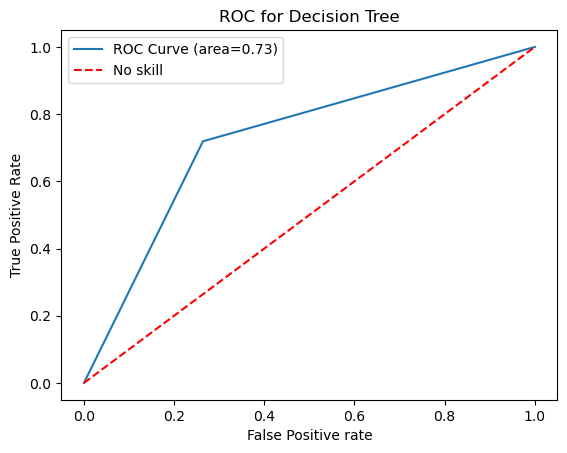

In [130]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,y_predict_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC Curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'r--',label='No skill')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend()
plt.show()

# Radom Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
modelR=RandomForestClassifier()
modelR.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
y_predR=modelR.predict(X_test)
y_predR

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [140]:
y_predict_probaR=modelR.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       125
           1       0.66      0.72      0.69        89

    accuracy                           0.73       214
   macro avg       0.72      0.73      0.72       214
weighted avg       0.73      0.73      0.73       214



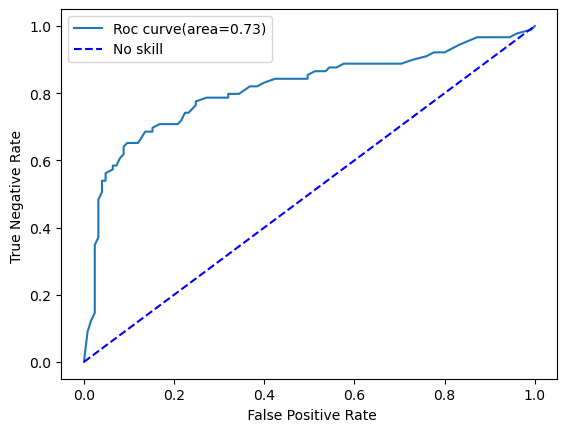

In [141]:
from sklearn.metrics import roc_curve,auc
fpr , tpr, thresholds= roc_curve(y_test,y_predict_probaR)
roc_auc1=auc(fpr,tpr)
plt.plot(fpr,tpr,label='Roc curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'b--',label='No skill')
plt.xlabel(' False Positive Rate')
plt.ylabel("True Negative Rate ")
plt.legend()
plt.show()

# Gradient Boosting

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
modelG=GradientBoostingClassifier()
modelG.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
modelG.score(X_train,y_train)

0.9397590361445783

In [147]:
y_predG=modelG.predict(X_test)
y_predG

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [151]:
y_predict_probaG=modelG.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predG)
cr=classification_report(y_test,y_predG)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       125
           1       0.79      0.70      0.74        89

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



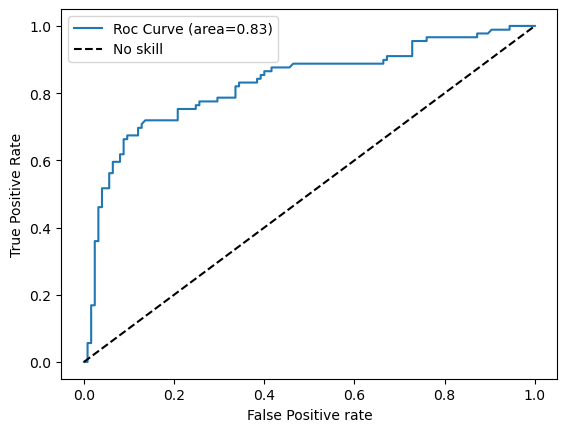

In [153]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds=roc_curve(y_test,y_predict_probaG)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='Roc Curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--',label='No skill')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
